<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import time
from sklearn.cluster import KMeans
from sklearn import metrics #Import scikit-learn metrics module 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [9]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [12]:
# k-means with all attributes - output is confusion matrix and error

kmeans = KMeans(n_clusters=2, random_state=1, max_iter=1000) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x)
toc = time.perf_counter()
tn, fp, fn, tp = confusion_matrix(y, labels).ravel()/y.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y, labels))
print(mean_absolute_error(y, labels))
print(np.mean(y-labels))
print(np.std(y-labels))

tp:  0.11197916666666667
fp:  0.10286458333333333
fn:  0.23697916666666666
tn:  0.5481770833333334
err:  0.33984375
time:  0.04958058100010021
0.33984375
0.33984375
0.13411458333333334
0.5673244473291508


In [13]:
# k-means with only glucose level, Age, BMI 
kmeans = KMeans(n_clusters=2, random_state=1) 
x1=df.drop(['Outcome', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin' , 'DiabetesPedigreeFunction'], axis=1)

tic = time.perf_counter()
labels = kmeans.fit_predict(x1)
toc = time.perf_counter()
tn, fp, fn, tp = confusion_matrix(y, labels).ravel()/y.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y, labels))
print(mean_absolute_error(y, labels))
print(np.mean(y-labels))
print(np.std(y-labels))



tp:  0.21614583333333334
fp:  0.12630208333333334
fn:  0.1328125
tn:  0.5247395833333334
err:  0.25911458333333337
time:  0.03129299299996546
0.2591145833333333
0.2591145833333333
0.006510416666666667
0.5089913533726872


tp:  0.203125
fp:  0.11848958333333333
fn:  0.14583333333333334
tn:  0.5325520833333334
err:  0.2643229166666667
time:  0.029048391000060292
0.2643229166666667
0.2643229166666667
0.02734375
0.5133957888438551


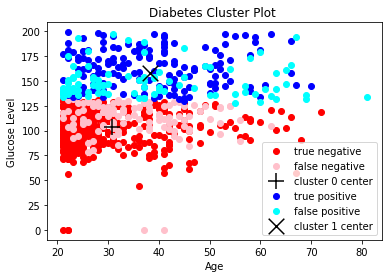

In [14]:
# k-means with only glucose level, Age
kmeans = KMeans(n_clusters=2, random_state=1) 
x1=df.drop(['Outcome', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin' , 'DiabetesPedigreeFunction', 'BMI'  ], axis=1)

tic = time.perf_counter()
labels = kmeans.fit_predict(x1)
toc = time.perf_counter()
tn, fp, fn, tp = confusion_matrix(y, labels).ravel()/y.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y, labels))
print(mean_absolute_error(y, labels))
print(np.mean(y-labels))
print(np.std(y-labels))

clx=df.drop(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin' , 'DiabetesPedigreeFunction', 'BMI'  ], axis=1)
clx['Cluster']=labels
cl_centers=kmeans.cluster_centers_

cl0 = clx.loc[clx['Cluster'] == 0]
cl0tn = cl0.loc[cl0['Outcome'] == 0]   # true negatives
cl0fn = cl0.loc[cl0['Outcome'] == 1]   # false negatives


cl1 = clx.loc[clx['Cluster'] == 1]
cl1tp = cl1.loc[cl1['Outcome'] == 1]   # true postives
cl1fp = cl1.loc[cl1['Outcome'] == 0]   # false postives

pyplot.scatter(cl0tn.Age, cl0tn.Glucose, color='red', label='true negative')
pyplot.scatter(cl0fn.Age, cl0fn.Glucose, color='pink', label='false negative')
pyplot.scatter(cl_centers[0][1], cl_centers[0][0], color='black', marker='+', s=288, label='cluster 0 center')

pyplot.scatter(cl1tp.Age, cl1tp.Glucose, color='blue', label='true positive')
pyplot.scatter(cl1fp.Age, cl1fp.Glucose, color='cyan', label='false positive')
pyplot.scatter(cl_centers[1][1], cl_centers[1][0], color='black', marker='x', s=244, label='cluster 1 center')

pyplot.title('Diabetes Cluster Plot ')
pyplot.ylabel('Glucose Level')
pyplot.xlabel('Age')
pyplot.legend()